<a href="https://colab.research.google.com/github/zhus-dika/ts_forecasting/blob/master/zhussupova_w2022_23_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SAS & HSE, Applied Time Series Forecasitng , Winter 2022 

<font color="blue"> HW #2 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму: https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл Surname_w2022_23_hw2.ipynb, например, ivanov_w2022_23_hw2.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadline**: <font color="red"> 10-Jan-2023 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(3,max(0,(10-ДнейПослеДедлайна/7))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже: 

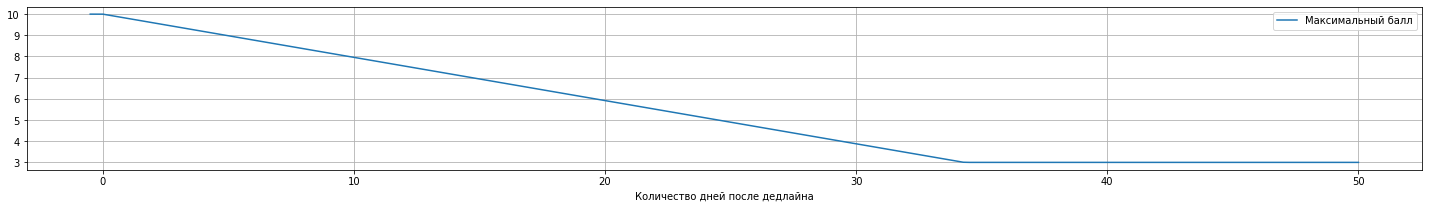

In [ ]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(0.3, (1-x/49)))] for x in np.linspace(-0.5,50,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 


**Questions 1: Write down an equation for $y_t$ (in a form $y_t=f\left(y_{t-1}, \ldots,y_{t-n}, \varepsilon_t, \ldots, \varepsilon_{t-m}\right)$)  that corresponds to the following ARIMA models**:
 - 1) ARIMA $(p=0,d=k,q=1)$,
    - <Answer>
    <br></br>
 - 2) ARIMA $(p=0,d=k+1,d=1)(P=1, D=1, Q=0)_s$,   
     - <Answer>
    <br></br>


<h1 align="center"> Practice</h1>

<h2 align="center">  1. Download data for following data sets (15%)</h2>


* 0) Download data
  <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> 
  
  description of the target ts you can find here  https://docs.google.com/spreadsheets/d/1HwwDZMCVUl-wpdY39TdBBKMwvks9VTe2gIpFtGBu-28/edit#gid=1251818784 </span> sheet "TS" in column O

* 1) plot target ts 
* 2) plot cros-series plot: independent variables and target variable on the same subplot 
* 3) answer the questions: 
    - is there seasonality? If there is seasonality then define period(s) of seasonality.
    - trend?
    - not-stable dispersion? 
* 4) define the proper list of transformations in order to make thet ts stationary (find optimal lambda in Box-Cox tranformation, if needed). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa import stattools
from copy import deepcopy

# don't forget to upload utils file to the colab session
from utils import qualityMAPE, qualityRMSE
import warnings, pylab
warnings.filterwarnings('ignore')

# setting of the plotting style, registers pandas date converters for matplotlib and the default figure size
import seaborn as sns
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(25, 5))
sns.mpl.rc("font", size=14)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv', parse_dates=['Date'])
ts = df[df.id == 5].drop(columns='id').set_index('Date')['2011-07-01':'2014-07 -01']

#df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv', parse_dates=['Date'])
#ts = df[df.id == 9].drop(columns='id').set_index('Date').iloc[:-14]  # Trim NaNs at the end of TS
ts.head(10)
ts.describe()

,EnergyConsumption,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
count,1097.000000,1097.000000,1097.000000,0.0,0.0,0.0,0.0,0.0,1097.000000,1097.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,146664.272634,5.426618,5.948222,NaN,NaN,NaN,NaN,NaN,0.140383,0.181404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17797.980108,12.836921,12.947269,NaN,NaN,NaN,NaN,NaN,0.347542,0.385528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,111045.255000,-28.500000,-28.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,132587.360000,-4.500000,-4.300000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,144814.509000,6.000000,7.500000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,161795.632000,17.000000,17.700000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,188739.600000,28.500000,28.600000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ts = ts.drop(columns=[f'Temp{i+1}' for i in range(2,7)], errors='ignore')
ts = ts.drop(columns=[f'Temp{i+1}_South_Less' for i in range(4)], errors='ignore')
ts = ts.drop(columns=[f'Temp{i+1}_South_Gr' for i in range(4)], errors='ignore')
ts.describe()

,EnergyConsumption,Temp1,Temp2,Saturday,Sunday
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,146664.272634,5.426618,5.948222,0.140383,0.181404
std,17797.980108,12.836921,12.947269,0.347542,0.385528
min,111045.255000,-28.500000,-28.000000,0.000000,0.000000
25%,132587.360000,-4.500000,-4.300000,0.000000,0.000000
50%,144814.509000,6.000000,7.500000,0.000000,0.000000
75%,161795.632000,17.000000,17.700000,0.000000,0.000000
max,188739.600000,28.500000,28.600000,1.000000,1.000000


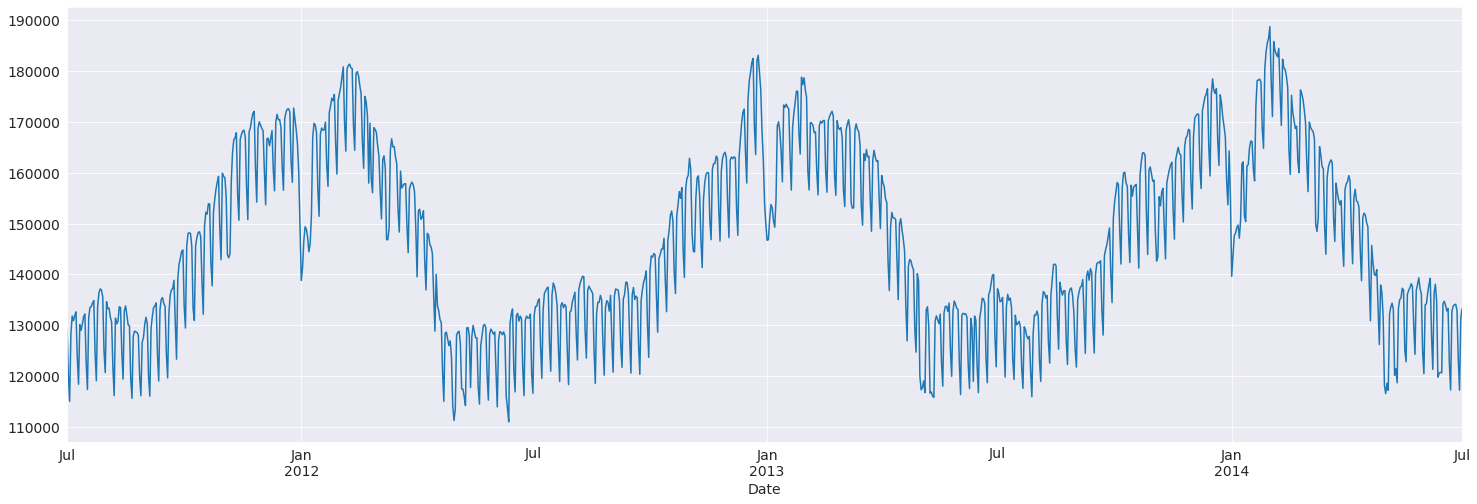

In [4]:
# Plot the whole time period
ts['EnergyConsumption'].plot(figsize=(25,8));

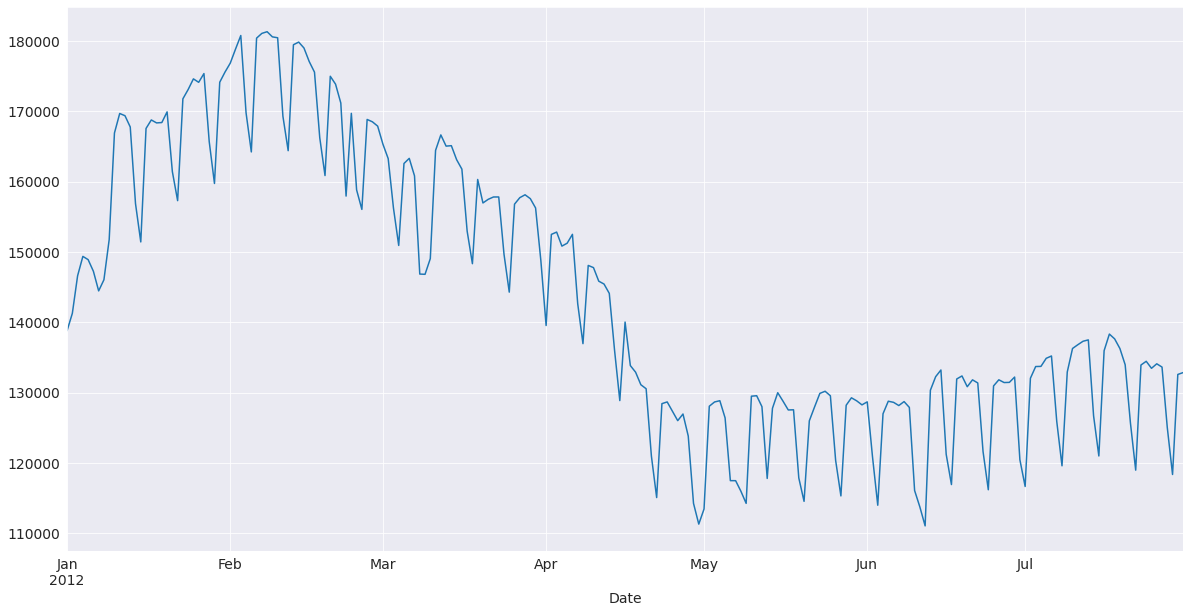

In [5]:
# Plot 6 months in order to see week seasonality
ts['EnergyConsumption']['2012-01':'2012-07'].plot(figsize=(20,10))
plt.show()

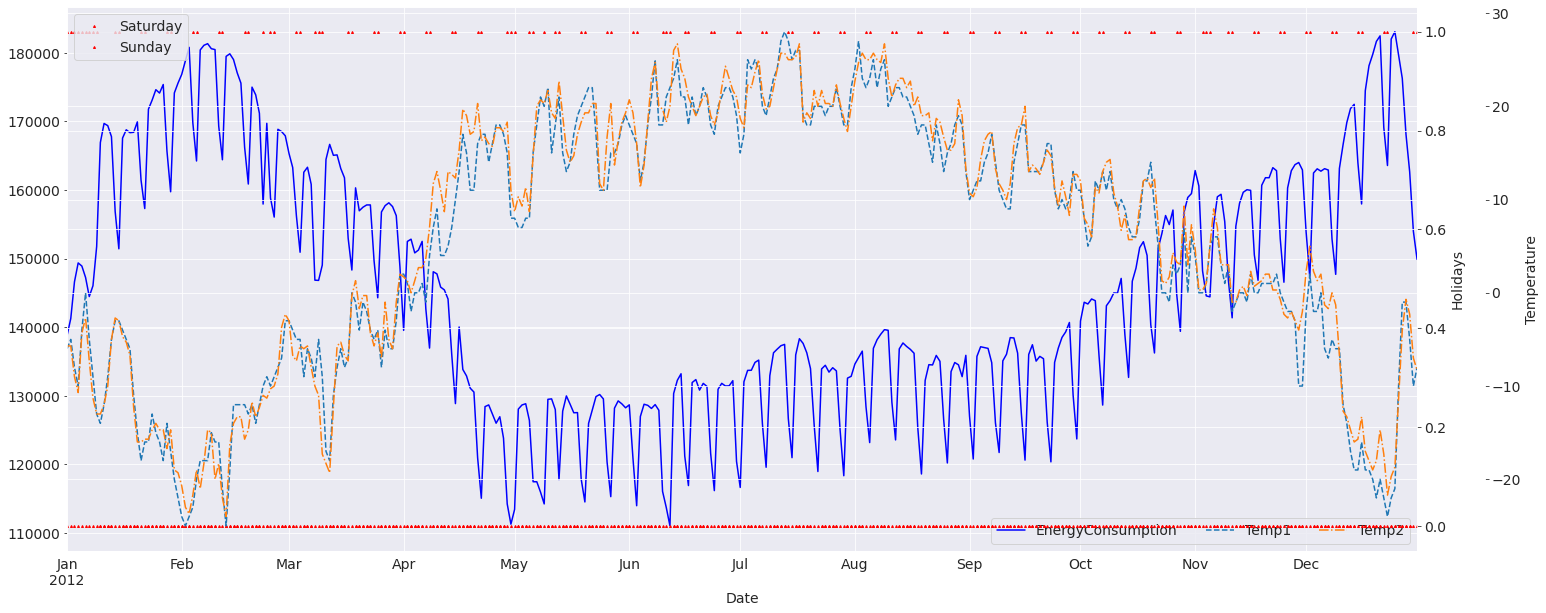

In [6]:
# Plot the TS together with independent variables
fig, ax = plt.subplots(figsize=[30,10])
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
ax3.set_ylabel('Temperature')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ts_to_plot = ts.loc['2012-01':'2012-12']
ts_to_plot['EnergyConsumption'].plot(ax = ax,  style='b-')
ts_to_plot[['Saturday', 'Sunday']].plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)

for col in ts.columns:
    if col.startswith('Temp'):
        style = '--' if col.endswith('1') else '-.'
        ts_to_plot[col].plot(ax = ax3,  style=style)

lines = ax.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower right', ncol=3)
ax2.legend(loc='upper left')
plt.show()

<h2 align="center">2. Fit ARIMA Model (50%) </h2>

**I. Build ARIMA forecast manually ** 

You should follow the next scheme:

 * 0) split the ts to two parts: first 80% of timestamps (ts1) and the last 20% of timestamps (ts2)   
 * 1) apply transformation to make the ts1 stationary;
 * 2) define exogenous variables and apply the transformations to them, if needed
 * 3) train simple ARIMA (0, 0, 0) with exogenous variables only, endog = 1) exog = 2);
 * 4) plot ACF/PACF for resifuals of the simple ARIMA(0, 0, 0) in order to understand which $p, P, q, Q$ can be used; define set of candidate parameters for ARMA (for the train TS);
 * 5) select the best parameters of the ARIMA models iteratively: 
    * While there are significant ACF/PACF lags and ARIMA can be trained
      - change only one of 6 ARIMA parameters (p, d, q, P, D, Q) 
      - compare the new model with the previous best model based on  AIC|BIC|HQIC
      - plot ACF/PACF of the best model

  **Note**: there is no goal to minimize AIC|BIC|HQIC, the goal is to exclude all significant autocorrelations from ACF/PACF.

* 6) Check  the best model residuals for 
    - unbiasedness, 
    - stationarity
    - non-autocorrelation
    - white noise hypothesis

    If all tests fail you need to review your choice.
* 7) Run analysis of the regression coafficients
    
    - if there are some insignificant regressors that can be eliminated, please exclude them from the model.

* 8) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 9) Calculate loss MAPE of your forecast. Does the forecast look appropriate?

In [7]:
# Split TS 80%-20%
split_idx = int(len(ts) * 0.8)
ts1 = ts.iloc[:split_idx]
ts2 = ts.iloc[split_idx:]

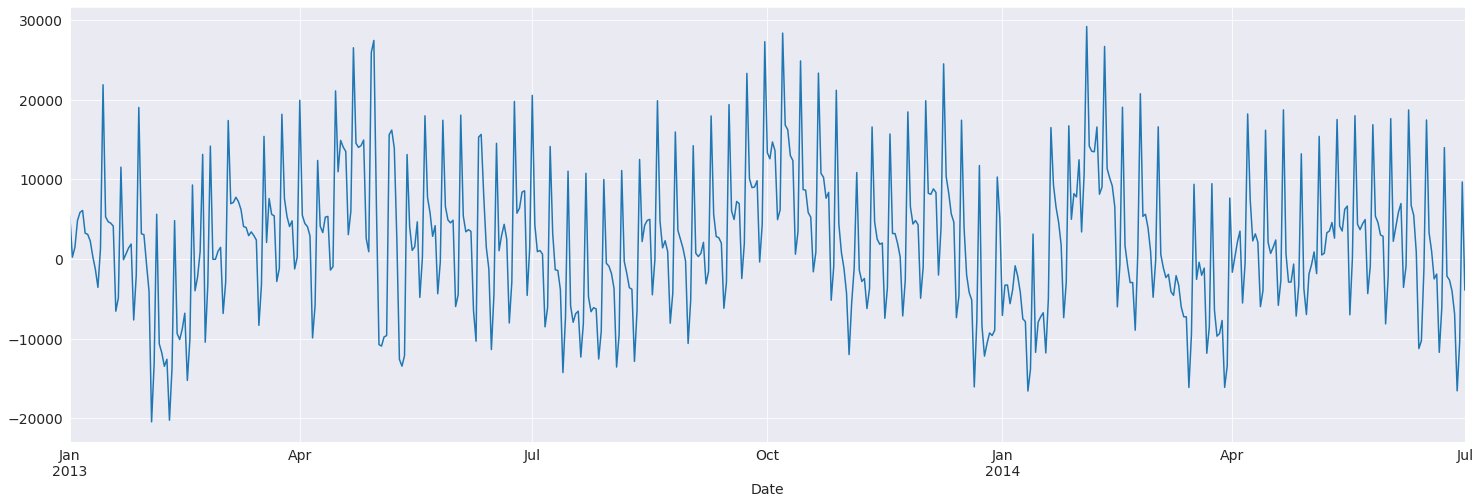

In [8]:
# seasonal differencing 1
s = 365
ts_sdiff = (ts - ts.shift(s)).iloc[s:]
ts_sdiff['EnergyConsumption']['2013':'2014'].plot(figsize=(25,8))
plt.show()

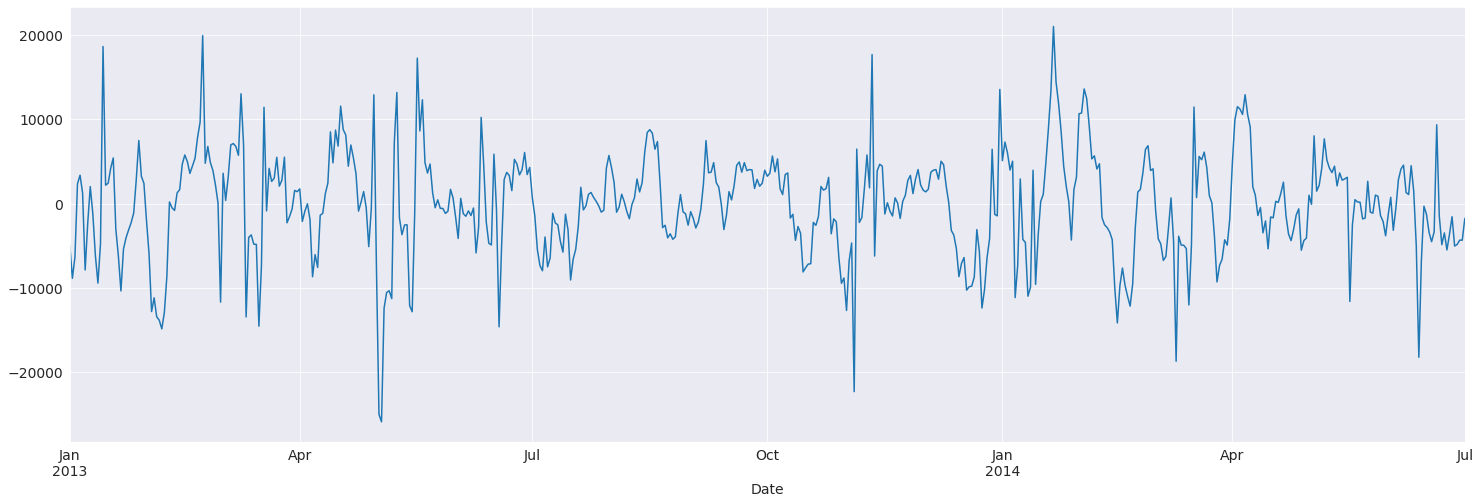

In [9]:
# seasonal differencing 2
s = 7
ts_ssdiff = (ts_sdiff - ts_sdiff.shift(s)).iloc[s:]
ts_ssdiff['EnergyConsumption']['2013':'2014'].plot(figsize=(25,8))
plt.show()

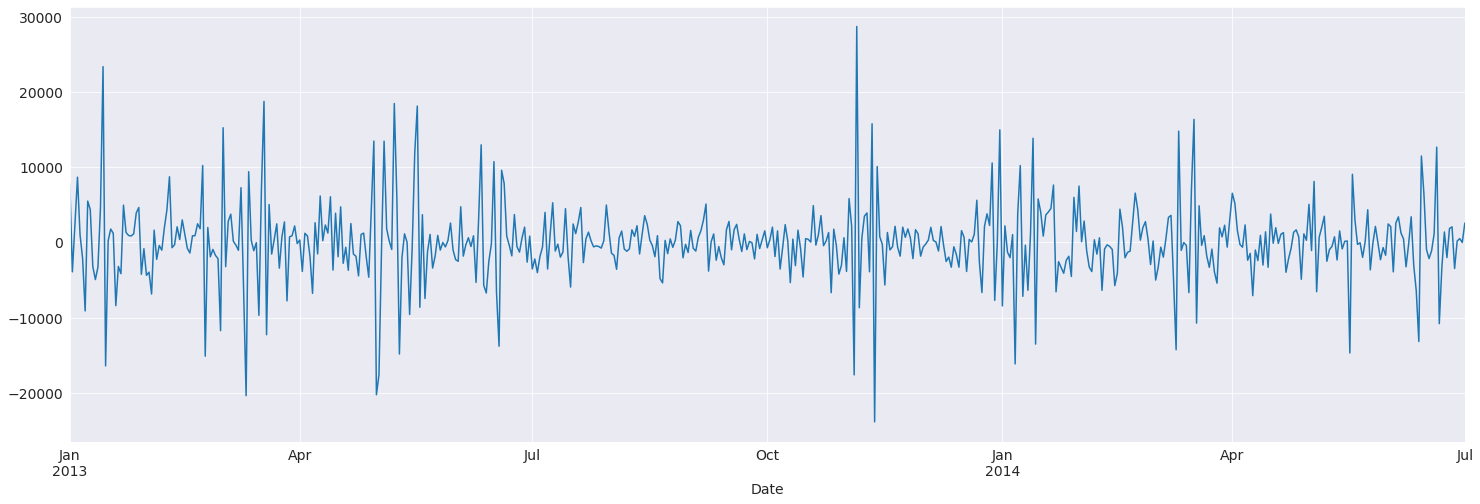

In [10]:
# trend differencing
ts_ssdiff_tdiff = (ts_ssdiff - ts_ssdiff.shift(1)).iloc[1:]
ts_ssdiff_tdiff['EnergyConsumption']['2013-01':'2014-07'].plot(figsize=(25,8))
plt.show()

In [11]:
# Augmented Dickey-Fuller unit root test: 
# H0: ts is not stationary (https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/)
df_stat = stattools.adfuller(ts_ssdiff_tdiff['EnergyConsumption'])
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -9.866006, 
pvalue: 0.00 
maximal Lag: 20 
critical values: {'1%': -3.4396861854831964, '5%': -2.865660062273053, '10%': -2.5689640195342456}


In [12]:
# Kwiatkowski–Phillips–Schmidt–Shin
# H0: ts is stationary (https://www.statisticshowto.com/kpss-test/)
kpss_stat= stattools.kpss(ts_ssdiff_tdiff['EnergyConsumption'])
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.014521, 
pvalue: 0.10 
maximal Lag: 20 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [13]:
def plot_acf_pacf(model, lags=365):
    fig = plt.figure(figsize=[25,10])
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid.values.squeeze(), lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid.values.squeeze(), lags=lags, ax=ax2)

                              ARMA Model Results                              
Dep. Variable:      EnergyConsumption   No. Observations:                  504
Model:                     ARMA(0, 0)   Log Likelihood               -4776.595
Method:                           css   S.D. of innovations           3160.333
Date:                Sat, 07 Jan 2023   AIC                           9565.190
Time:                        11:31:34   BIC                           9590.526
Sample:                    07-08-2012   HQIC                          9575.128
                         - 11-23-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7472    140.773     -0.020      0.984    -278.657     273.163
Temp1          2.9388     39.676      0.074      0.941     -74.824      80.701
Temp2        -47.0794     38.731     -1.216      0.2

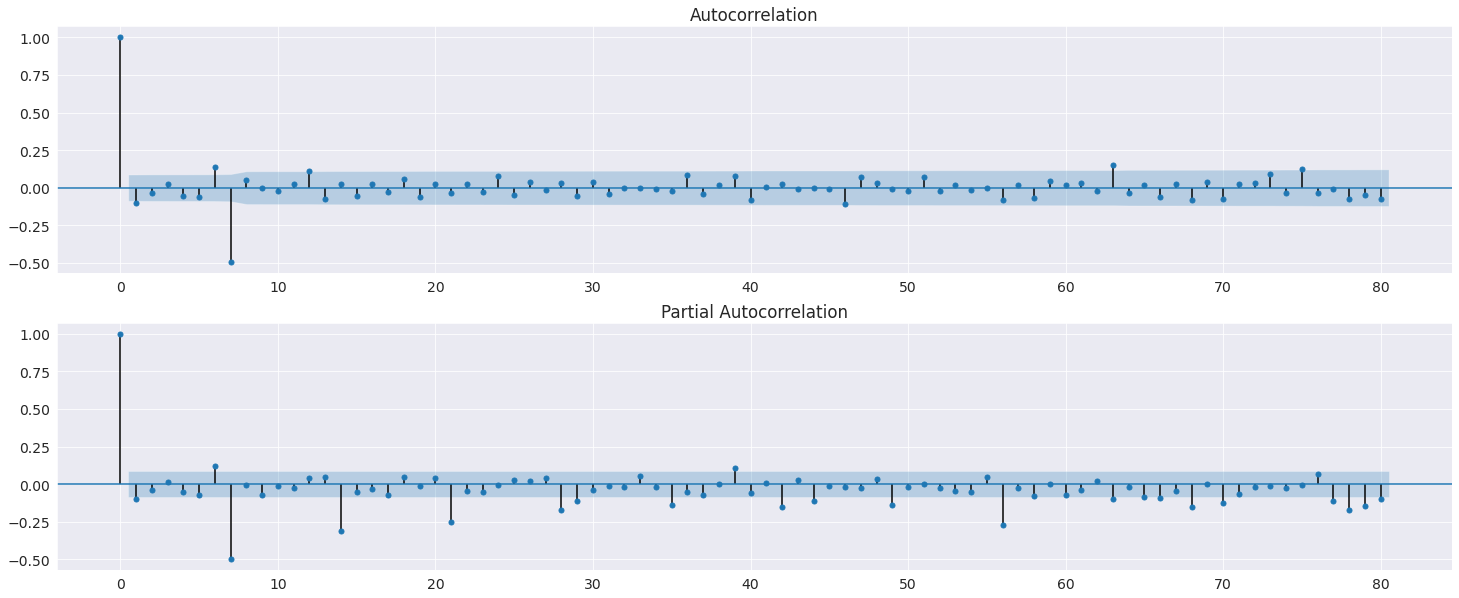

In [14]:
# Step 0: train ARIMA(0,0,0)
ts_ssdiff_tdiff_1 = ts_ssdiff_tdiff[:-len(ts2)]
endog = ts_ssdiff_tdiff_1['EnergyConsumption']
exogs = ts_ssdiff_tdiff_1.drop(columns=['EnergyConsumption'])
arima_order_000 = sm.tsa.ARIMA(endog=endog, order=[0,0,0], exog=exogs).fit()
print(arima_order_000.summary())
plot_acf_pacf(arima_order_000, lags=80)

Analysis of ACF and PACF for ARIMA(0,0,0) suggests the following parameter candidate values:
* q = {1,2,6}
* Q = {1}
* p = {1,2,6}
* P = {1,2,3,...}

Let's move step-by-step and start with changing only one parameter.

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  504
Model:             SARIMAX(0, 0, [1], 7)   Log Likelihood               -4635.405
Date:                   Sat, 07 Jan 2023   AIC                           9282.809
Time:                           11:31:42   BIC                           9308.145
Sample:                       07-08-2012   HQIC                          9292.748
                            - 11-23-2013                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1         -7.4996     42.778     -0.175      0.861     -91.342      76.343
Temp2        -41.4604     36.957     -1.122      0.262    -113.895      30.974
Saturday   -6020.8676    972

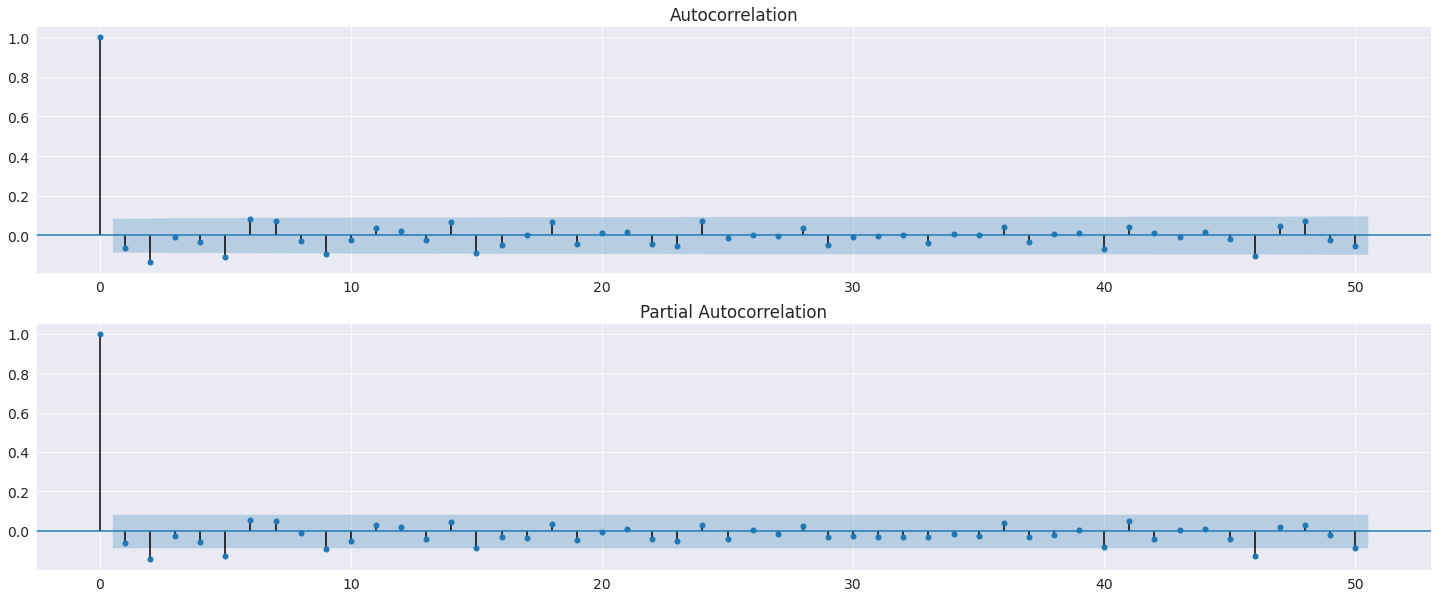

In [15]:
# Step 1: train ARIMA(0,0,0)x(0,0,1,7)
arima_order_000_001 = sm.tsa.SARIMAX(endog=endog, order=[0,0,0], seasonal_order=[0,0,1,7], exog=exogs).fit()
print(arima_order_000_001.summary())
plot_acf_pacf(arima_order_000_001, lags=50)

                                          SARIMAX Results                                          
Dep. Variable:                           EnergyConsumption   No. Observations:                  504
Model:             SARIMAX([1, 2, 6], 0, 0)x(0, 0, [1], 7)   Log Likelihood               -4633.648
Date:                                     Sat, 07 Jan 2023   AIC                           9285.296
Time:                                             11:31:49   BIC                           9323.300
Sample:                                         07-08-2012   HQIC                          9300.204
                                              - 11-23-2013                                         
Covariance Type:                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -65.4430     46.607     -1.40

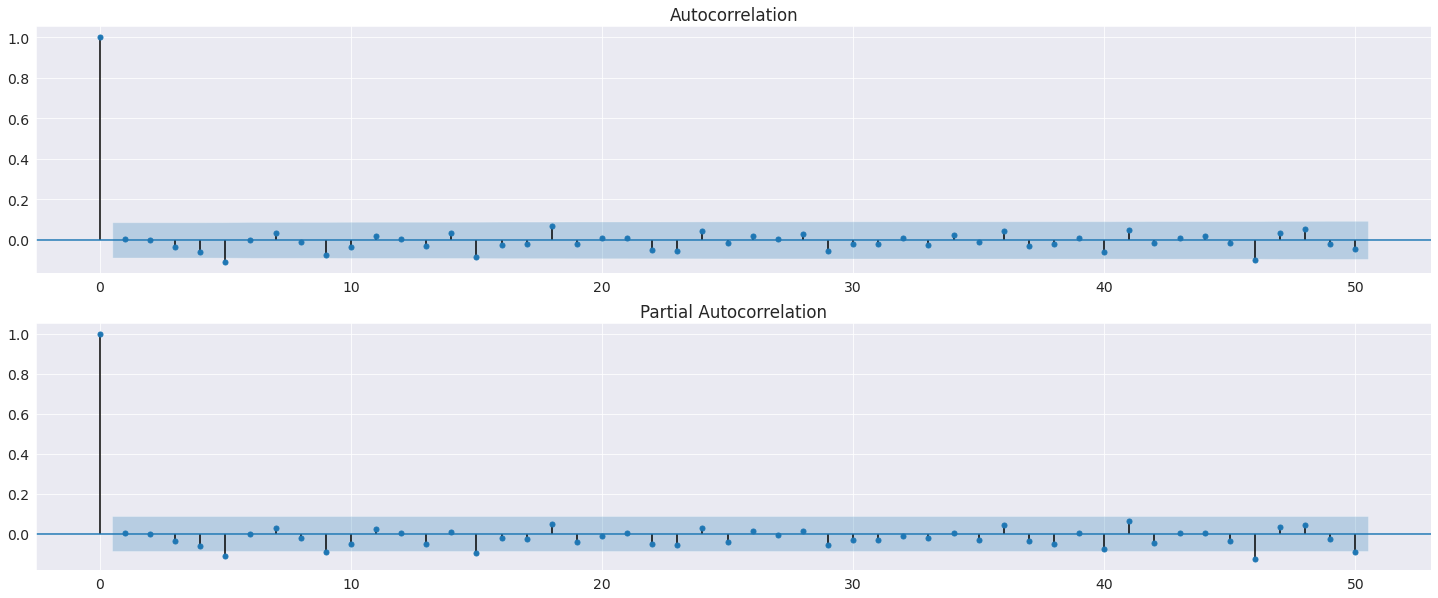

In [16]:
# Step 2: train ARIMA((6,0,0)x(0,0,1,7)
# We use only lags 1, 2 and 6 in order to make ARIMA a bit simpler
arima_order_600_001 = sm.tsa.SARIMAX(endog=endog, order=[(1,2,6),0,0], seasonal_order=[0,0,1,7], exog=exogs).fit()
print(arima_order_600_001.summary())
plot_acf_pacf(arima_order_600_001, lags=50)

                                          SARIMAX Results                                          
Dep. Variable:                           EnergyConsumption   No. Observations:                  504
Model:             SARIMAX([1, 2, 6], 0, 0)x(1, 0, [1], 7)   Log Likelihood               -4631.908
Date:                                     Sat, 07 Jan 2023   AIC                           9283.815
Time:                                             11:32:11   BIC                           9326.041
Sample:                                         07-08-2012   HQIC                          9300.379
                                              - 11-23-2013                                         
Covariance Type:                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -61.3885     48.077     -1.27

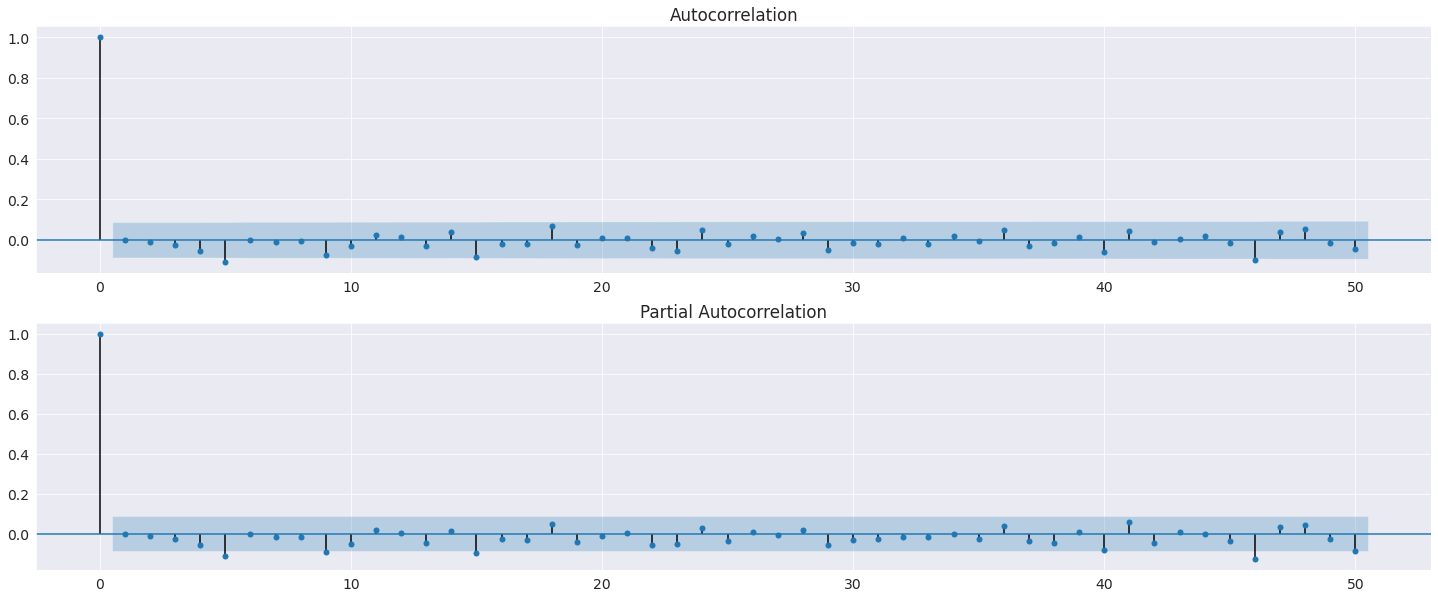

In [17]:
# Step 3: train ARIMA(6,0,0)x(1,0,1,7)
arima_order_600_101 = sm.tsa.SARIMAX(endog=endog, order=[(1,2,6),0,0], seasonal_order=[1,0,1,7], exog=exogs).fit()
print(arima_order_600_101.summary())
plot_acf_pacf(arima_order_600_101, lags=50)

                                            SARIMAX Results                                             
Dep. Variable:                                EnergyConsumption   No. Observations:                  504
Model:             SARIMAX([1, 2, 6], 0, [1, 6])x(1, 0, [1], 7)   Log Likelihood               -4662.240
Date:                                          Sat, 07 Jan 2023   AIC                           9348.479
Time:                                                  11:32:20   BIC                           9399.150
Sample:                                              07-08-2012   HQIC                          9368.356
                                                   - 11-23-2013                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Te

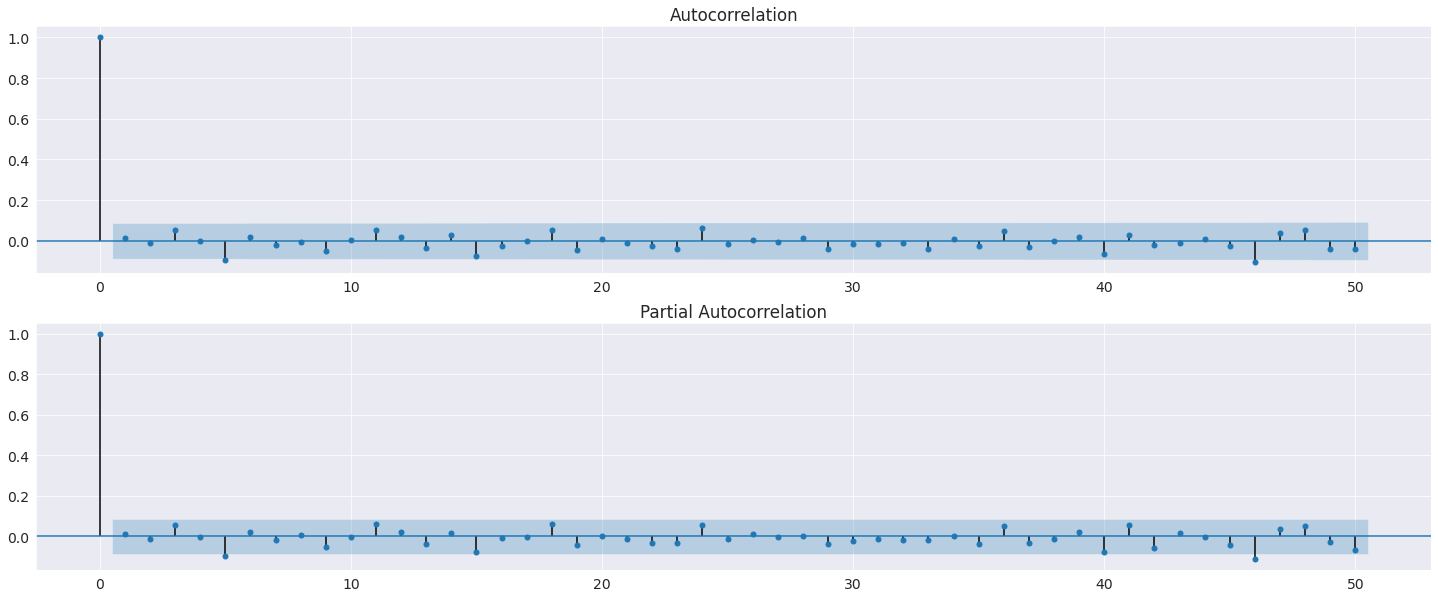

In [18]:
# Step 4: train ARIMA(6,0,6)x(1,0,1,7)
arima_order_606_101 = sm.tsa.SARIMAX(endog=endog, order=[(1,2,6),0,(1,6)], seasonal_order=[1,0,1,7], exog=exogs).fit()
print(arima_order_606_101.summary())
plot_acf_pacf(arima_order_606_101, lags=50)

In [19]:
arima_best = arima_order_606_101

[]

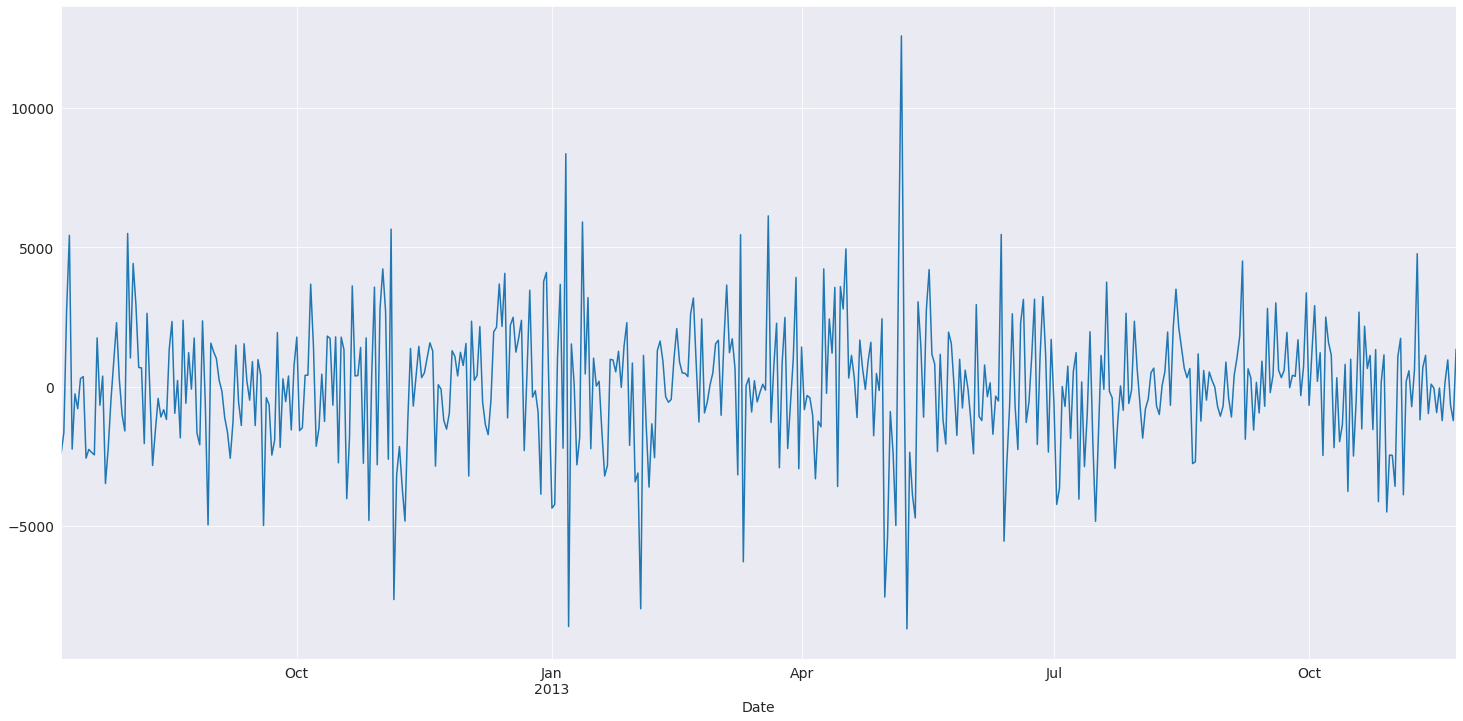

In [20]:
arima_best.resid.plot(figsize=[25,12])
plt.plot()

In [21]:
# Augmented Dickey-Fuller unit root test: 
df_stat = stattools.adfuller(arima_best.resid.values)
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -22.125260, 
pvalue: 0.00 
maximal Lag: 0 
critical values: {'1%': -3.4434175660489905, '5%': -2.8673031724657454, '10%': -2.5698395516760275}


In [22]:
# Kwiatkowski–Phillips–Schmidt–Shin
kpss_stat= stattools.kpss(arima_best.resid.values)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.051788, 
pvalue: 0.10 
maximal Lag: 18 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


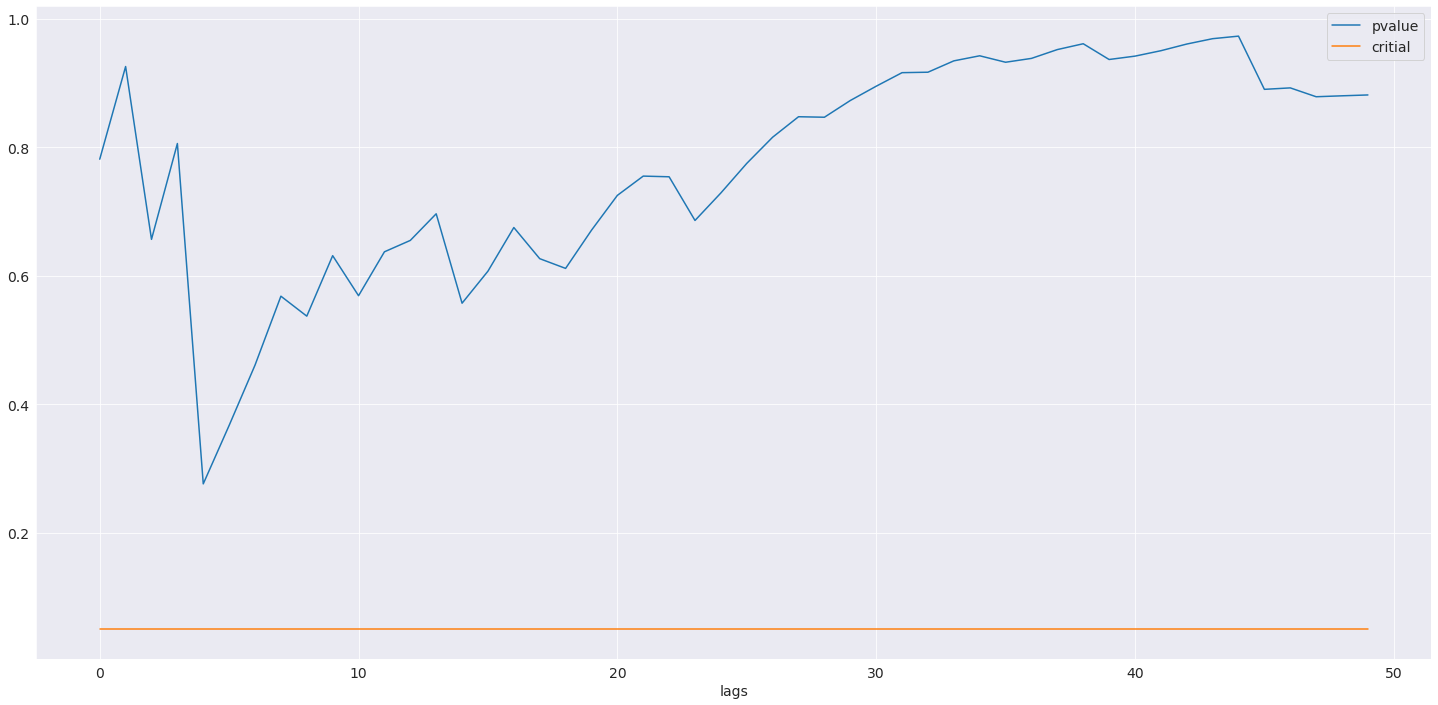

In [23]:
# Ljung-Box test
# H0: residuals are not autocorrelated (https://www.statisticshowto.com/ljung-box-test/)
nlags = 50
pd.DataFrame({
    'lags': range(nlags),
    'pvalue': sm.stats.diagnostic.acorr_ljungbox(arima_best.resid.values, lags=nlags)[1], 
    'critial': np.array([0.05]*nlags)
}).set_index('lags').plot(figsize=[25,12])
plt.show()

In [24]:
# Durbin-Watson statistic
# H0: residuals are not autocorrelated (https://www.statisticshowto.com/durbin-watson-test-coefficient/)
# Must be close or equal to 2
sm.stats.durbin_watson(arima_best.resid.values)

1.9725239579497507

In [25]:
# Wilcoxon test
# H0: residuals are unbiased (https://www.statisticshowto.com/wilcoxon-signed-rank-test)
stat, p = stats.wilcoxon(arima_best.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat, p))

Statistic: 62266.000000
pvalue: 0.68


NormaltestResult(statistic=35.36909143266595, pvalue=2.087850416025054e-08)


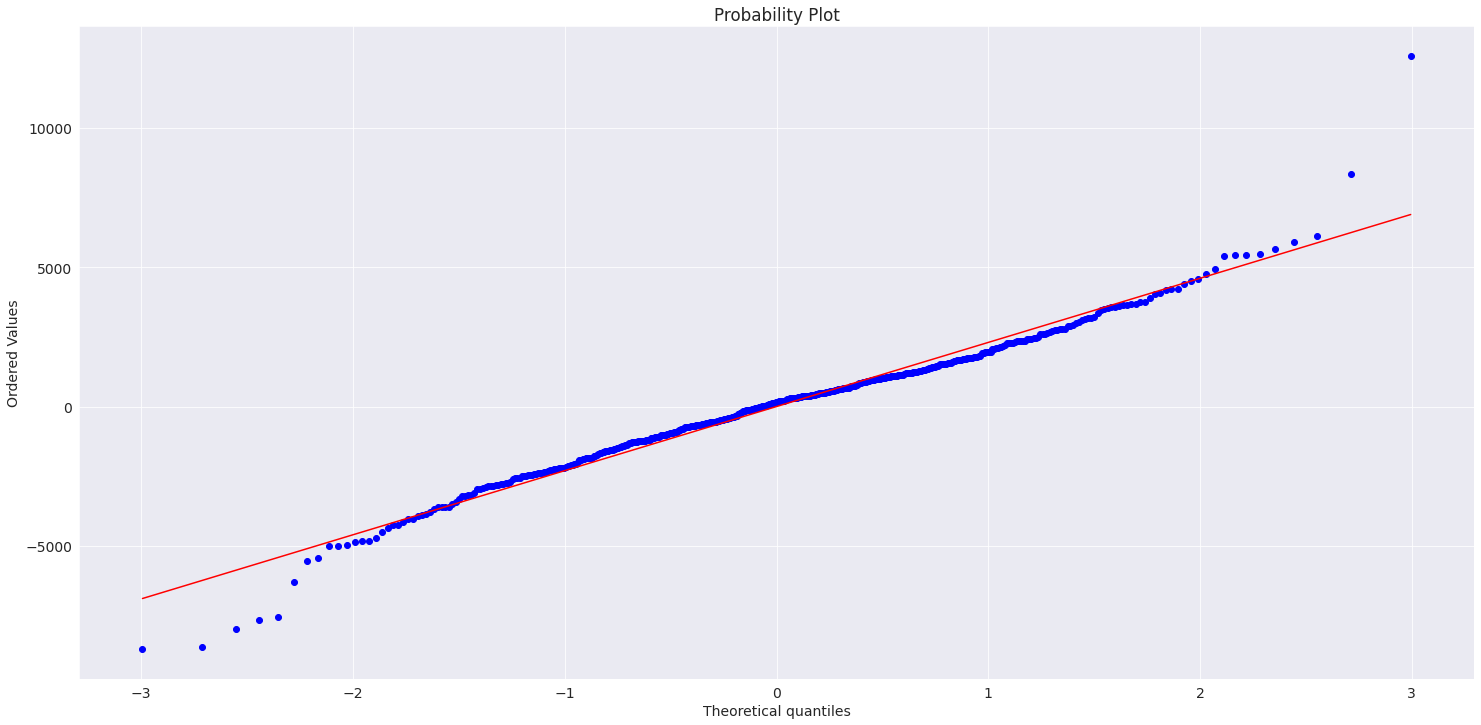

In [26]:
# Normaliry test
# H0: residuals are normally distributed
print(stats.normaltest(arima_best.resid))

plt.figure(figsize=[25,12])
res = stats.probplot(arima_best.resid, dist="norm", plot = plt)

                                            SARIMAX Results                                             
Dep. Variable:                                EnergyConsumption   No. Observations:                  512
Model:             SARIMAX([1, 2, 6], 1, [1, 6])x(1, 1, [1], 7)   Log Likelihood               -4681.780
Date:                                          Sat, 07 Jan 2023   AIC                           9385.561
Time:                                                  11:36:21   BIC                           9432.009
Sample:                                              06-30-2012   HQIC                          9403.781
                                                   - 11-23-2013                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Su

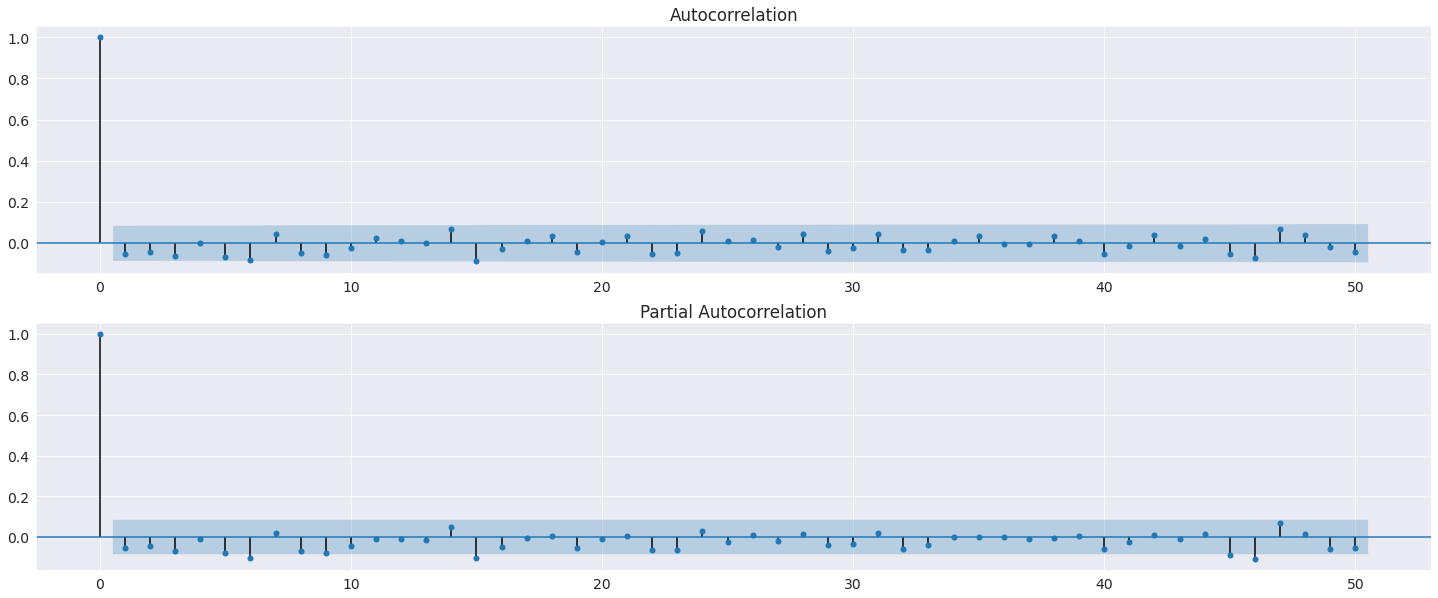

In [28]:
# Rebuild best model excluding insignificant regressors
# Use data differentiated w.r.t. yearly seasonality as SARIMAX can handle only 1 period
ts_sdiff_1 = ts_sdiff[:-len(ts2)]
endog = ts_sdiff_1['EnergyConsumption']
exogs = ts_sdiff_1[['Sunday', 'Temp1', 'Temp2']]
arima_best = sm.tsa.SARIMAX(endog=endog, order=[(1,2,6),1,(1,6)], seasonal_order=[1,1,1,7], exog=exogs).fit()
print(arima_best.summary())
plot_acf_pacf(arima_best, lags=50)

In [29]:
# Predict
ts_pred = arima_best.get_prediction()
ts_pred_ci = ts_pred.conf_int()

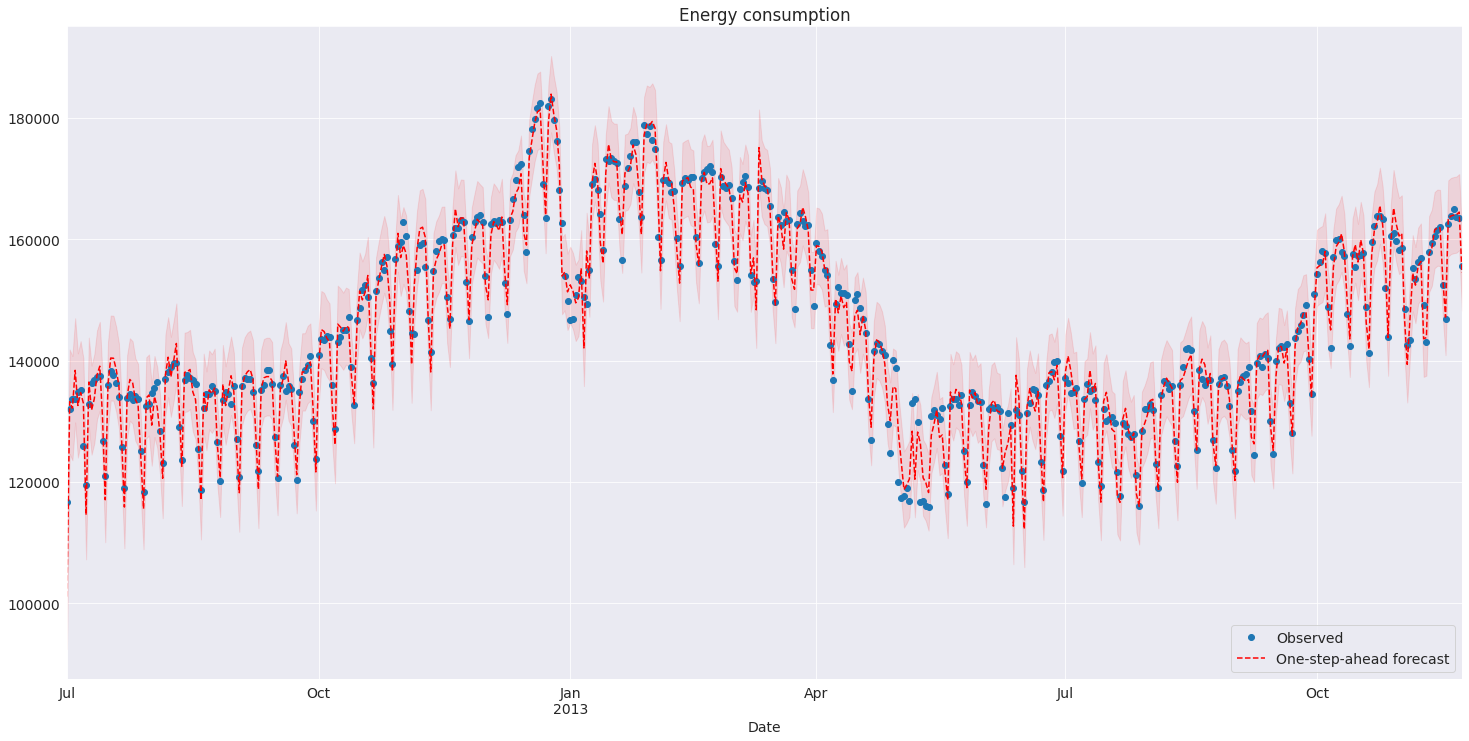

In [32]:
# Graph
fig, ax = plt.subplots(figsize=[25,12])
npre = 4
ax.set(title='Energy consumption', xlabel='Date')

start = '2012-07-01'
end = '2014-01-01'

# Plot data points
ts1.loc[start:end]['EnergyConsumption'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
ts_pred_int = ts_pred.predicted_mean + ts1.shift(365)['EnergyConsumption']
ts_pred_int[start:end].plot(ax=ax, style='r--', label='One-step-ahead forecast')

ci_low = (ts_pred_ci.loc[:,ts_pred_ci.columns[0]] + ts1.shift(365)['EnergyConsumption']).loc[start:end]
ci_high = (ts_pred_ci.loc[:,ts_pred_ci.columns[1]] + ts1.shift(365)['EnergyConsumption']).loc[start:end]
ax.fill_between(ci_low.index, ci_low, ci_high, color='r', alpha=0.1)

legend = ax.legend(loc='lower right')

In [34]:
# Build forecast
ts_sdiff_2 = ts_sdiff[-len(ts2):]
exogs = ts_sdiff_2[['Sunday', 'Temp1', 'Temp2']]
ts_frc = arima_best.forecast(steps=len(ts_sdiff_2), exog=exogs)
ts_frc_int = (ts_frc + ts.shift(365)['EnergyConsumption']).iloc[-len(ts2):]

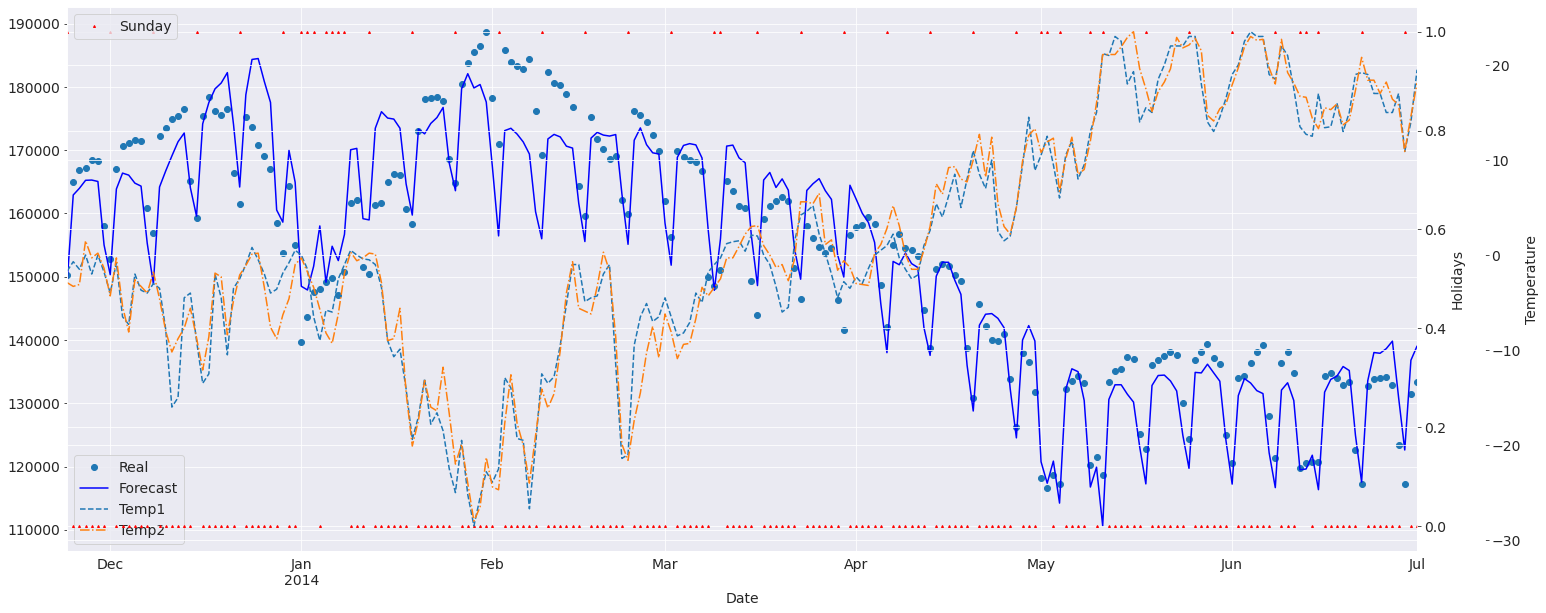

In [36]:
# Plot the TS together with independent variables
fig, ax = plt.subplots(figsize=[30,10])
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
ax3.set_ylabel('Temperature')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ts2['EnergyConsumption'].plot(ax = ax,  style='o', label='Real')
ts_frc_int.plot(ax = ax,  style='b-', label='Forecast')
ts2[['Sunday']].plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)

for col in exogs.columns:
    if col.startswith('Temp'):
        style = '--' if col.endswith('1') else '-.'
        ts2[col].plot(ax = ax3,  style=style)

lines = ax.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower left', ncol=1)
ax2.legend(loc='upper left')
plt.show()

<h2 align="center">2. Find the best ARIMA Model automatically (30%) </h2>

* 0) define candidates for $p, d, q, P, D, Q$ values  
* 1) Run grid search for ARIMA parameters (use ts1 from the previous section) according to AIC|BIC|HQIC, feel free to use your own approach how to define the best model based on AIC|BIC|HQIC. How many time does it take to fit all ARIMA?
* 2) Run Residuals and Coefficint analysis for the best model
  - If all tests fail you need to rebuild automatically selected model (you can do it manually).
  - if there are some insignificant regressors that can be eliminated, please exclude them from the model.
* 3) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 4) Calculate loss MAPE of your forecast. Which model manually generated or automatically generated is better?

In [ ]:
# Put your code here

<h1 align="center"> Theoretical Bonus Part (Extra 50%)</h1>

<br></br>





**1. Let's consider simple AR model:** 
$$AR(p)\colon \;\;\; y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t,$$  

where 
  - $y_t$ is a stationary time series with zero average,
  - $\phi_1,\dots,\phi_p$ are constants ($\phi_q \neq 0$), $~~$
  - $\varepsilon_t$ is gaussian white noise with zero average and constant dispersion $\sigma_\varepsilon^2.$
<br></br>
Proof that partial autocorrelation coefficients depend on $p$ and $\tau$ only:
   $$rr_{\tau} = {\bf{E}}[y_t-\hat y_t, y_{t+\tau} - \hat y_{t+\tau}]= \begin{cases}0 &, \tau>p; \\ f(\tau, p)>0 &, 1\leq\tau\leq p. \end{cases}$$
	
  where $\hat y_t$ - forecast of $y_t$ with following regression model $$y_t = \sum_{j=1}^{\tau-1}\beta_j y_{t+j}$$
  $\hat y_{t+\tau}$ - forecast of $y_{t+\tau}$ with following regression model $$y_{t+\tau} = \sum_{j=1}^{\tau-1}\gamma_j y_{t+j}.$$

<br></br>
<Answer>



**2. Let's consider simple MA model:**
  $$MA(q)\colon \;\;\; y_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q},$$
  where 
  - $y_t$ is a stationary time series with zero average,$~~$
  - $\theta_1,\dots,\theta_q$ are constants ($\theta_q \neq 0$),$~~$ 
  - $\varepsilon_t$ is gaussian white noise with zero average and constant dispersion $\sigma_\varepsilon^2.$


Proof that the correlation coefficients depend on $\tau$ and $q$
$$r_\tau=\begin{cases}0 &, \tau>q; \\ f(\tau,q)>0 &, \tau\leq q. \end{cases}$$

<br></br>
<Answer>

**3. How to select candiates for $p$ and $q$ parameters for simple ARMA model based on ACF and PACF.**

<h1 align="center"> Practical Bonus Part (Extra 50%)</h1>

Realize method for searching optimal $\lambda$ for boxcox transformation.
Approach for finding the optimal $\lambda$ is descibed <a href="https://www.academia.edu/23049010/Time_series_analysis_supported_by_power_transformations">here</a>.  

You need to replace all 'TODO' below by some code:

In [ ]:
import numpy as np
class boxcox():
    def __init__(self, lmbda=None, shift=0):
        '''
    Box Cox Transforms
    Transforms data are to be normal. Also known as power transform.
    
    Parameters
        ----------
    lmbda: float or None
        lmbda the power parameter. The None input automatically calculates
        lmbda based on method guerrero
    shift: float
        Use to normalize data by shifting data to all positive values
        
        '''
        self.lmbda = lmbda
        self.shift = shift
        self.y = []
        self.method = 'guerrero'
        
    def transform(self, x, n=2):
        '''
            x: time series
            n: number of subseries with constant dispersion
        '''
        x = 1.0*np.asarray(x)
        
        if self.shift>0:
            x=  'TODO: shift time series up'
            
        if self.lmbda is None:
            self.lmbda = 'TODO: shift time series up'
            
        
            
        if self.lmbda == 0:
            self.y = 'TODO: '
        else:
            self.y = 'TODO: '
        return self.y, self.lmbda
        
    def optimal_lambda(self,x, n=2):
        """
        Parameters
        ----------
        x - time series with different variance through the time
        n - number of subseries in x, each subseries x_i has constant variance sigma_i and constant mean m_i
        The method states, that optimal lambda should be chosen in such a way that
         
         sigma_i/(m_i)**(1-lambda) = constant, for all i=1,...,n
        
        you need to find solution for the follow Regression problem:
        
        log(sigma_i) = w_1 + w_2*log(m_i), where
        w_2 = 1-lambda
        
        """
        x = 1.0*np.asarray(x)
               
        sigma = 'TODO: initialize array for log(sigma_i)'
        m = 'TODO: initialize array for matrix of regression [1, log(m_i)]'

        r = len(x)/n  # the length of each subseries

        for i in range(n):
            m[1][i] = 'TODO: fill matrix of regression'
            sigma[i] = 'TODO: fill array of sigma'

        # find the solution for regression Xw=y, where X = m, w[1] = 1-lambda, 
        w = np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,y))[1]
        
        self.lmbda = 'TODO: set value of lambda'
        
        print self.lmbda
        
        return self.lmbda

    def inverse(self, y=None):
        """
        Parameters
        ----------
        y: time series

        Returns
        -------
        x: inverse transformed ts
    
        """
        if y is None:
            y = self.y
        
        if self.lmbda == 0:
            x = 'TODO' 
        else:
            x = 'TODO'
        return x

In [ ]:
# Check on Wage data
# boxcox transformation for wage dataset 
ts_wage = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')

In [ ]:
# cut first steps
ts_wage = ts_wage.ix['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(25,5))

In [ ]:
bc = boxcox()
ts_wage['wage_boxcox'], lmbda = bc.transform(ts_wage['Real wage'],n=18)
print ('lambda=', lmbda)
ts_wage['wage_boxcox'].plot(figsize=(15,5))